In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# About the Data

In [2]:
# Array
import numpy as np

# Dataframe
import pandas as pd

#Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# warnings
import warnings
warnings.filterwarnings('ignore')

# Data Reading
credit_c=pd.read_csv("credit_customers.csv")

# Taking Data Copy
credit=credit_c.copy()

# Data
credit.head()

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,other_parties,...,property_magnitude,age,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker,class
0,<0,6.0,critical/other existing credit,radio/tv,1169.0,no known savings,>=7,4.0,male single,none,...,real estate,67.0,none,own,2.0,skilled,1.0,yes,yes,good
1,0<=X<200,48.0,existing paid,radio/tv,5951.0,<100,1<=X<4,2.0,female div/dep/mar,none,...,real estate,22.0,none,own,1.0,skilled,1.0,none,yes,bad
2,no checking,12.0,critical/other existing credit,education,2096.0,<100,4<=X<7,2.0,male single,none,...,real estate,49.0,none,own,1.0,unskilled resident,2.0,none,yes,good
3,<0,42.0,existing paid,furniture/equipment,7882.0,<100,4<=X<7,2.0,male single,guarantor,...,life insurance,45.0,none,for free,1.0,skilled,2.0,none,yes,good
4,<0,24.0,delayed previously,new car,4870.0,<100,1<=X<4,3.0,male single,none,...,no known property,53.0,none,for free,2.0,skilled,2.0,none,yes,bad


# Data Description

In [3]:
# Changing object to category
cat= credit.select_dtypes(exclude=[np.number])
for i in list(cat.columns):
    credit[i]=credit[i].astype('category')

# Cheking Data Info
credit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype   
---  ------                  --------------  -----   
 0   checking_status         1000 non-null   category
 1   duration                1000 non-null   float64 
 2   credit_history          1000 non-null   category
 3   purpose                 1000 non-null   category
 4   credit_amount           1000 non-null   float64 
 5   savings_status          1000 non-null   category
 6   employment              1000 non-null   category
 7   installment_commitment  1000 non-null   float64 
 8   personal_status         1000 non-null   category
 9   other_parties           1000 non-null   category
 10  residence_since         1000 non-null   float64 
 11  property_magnitude      1000 non-null   category
 12  age                     1000 non-null   float64 
 13  other_payment_plans     1000 non-null   category
 14  housing                 1

In [4]:
# Spliting Personal Status
new= credit['personal_status'].str.split(" ",n=1,expand=True)
credit['gender']=new[0]
credit['marital_status']=new[1]

#Checking Data
credit.head()

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,other_parties,...,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker,class,gender,marital_status
0,<0,6.0,critical/other existing credit,radio/tv,1169.0,no known savings,>=7,4.0,male single,none,...,none,own,2.0,skilled,1.0,yes,yes,good,male,single
1,0<=X<200,48.0,existing paid,radio/tv,5951.0,<100,1<=X<4,2.0,female div/dep/mar,none,...,none,own,1.0,skilled,1.0,none,yes,bad,female,div/dep/mar
2,no checking,12.0,critical/other existing credit,education,2096.0,<100,4<=X<7,2.0,male single,none,...,none,own,1.0,unskilled resident,2.0,none,yes,good,male,single
3,<0,42.0,existing paid,furniture/equipment,7882.0,<100,4<=X<7,2.0,male single,guarantor,...,none,for free,1.0,skilled,2.0,none,yes,good,male,single
4,<0,24.0,delayed previously,new car,4870.0,<100,1<=X<4,3.0,male single,none,...,none,for free,2.0,skilled,2.0,none,yes,bad,male,single


In [5]:
# Dropping Personal Status
credit.drop('personal_status',axis=1,inplace=True)

In [6]:
# Cheking categorical features
cat=credit.select_dtypes(exclude=[np.number])
cat.columns

Index(['checking_status', 'credit_history', 'purpose', 'savings_status',
       'employment', 'other_parties', 'property_magnitude',
       'other_payment_plans', 'housing', 'job', 'own_telephone',
       'foreign_worker', 'class', 'gender', 'marital_status'],
      dtype='object')

Visualizing Categorical Features

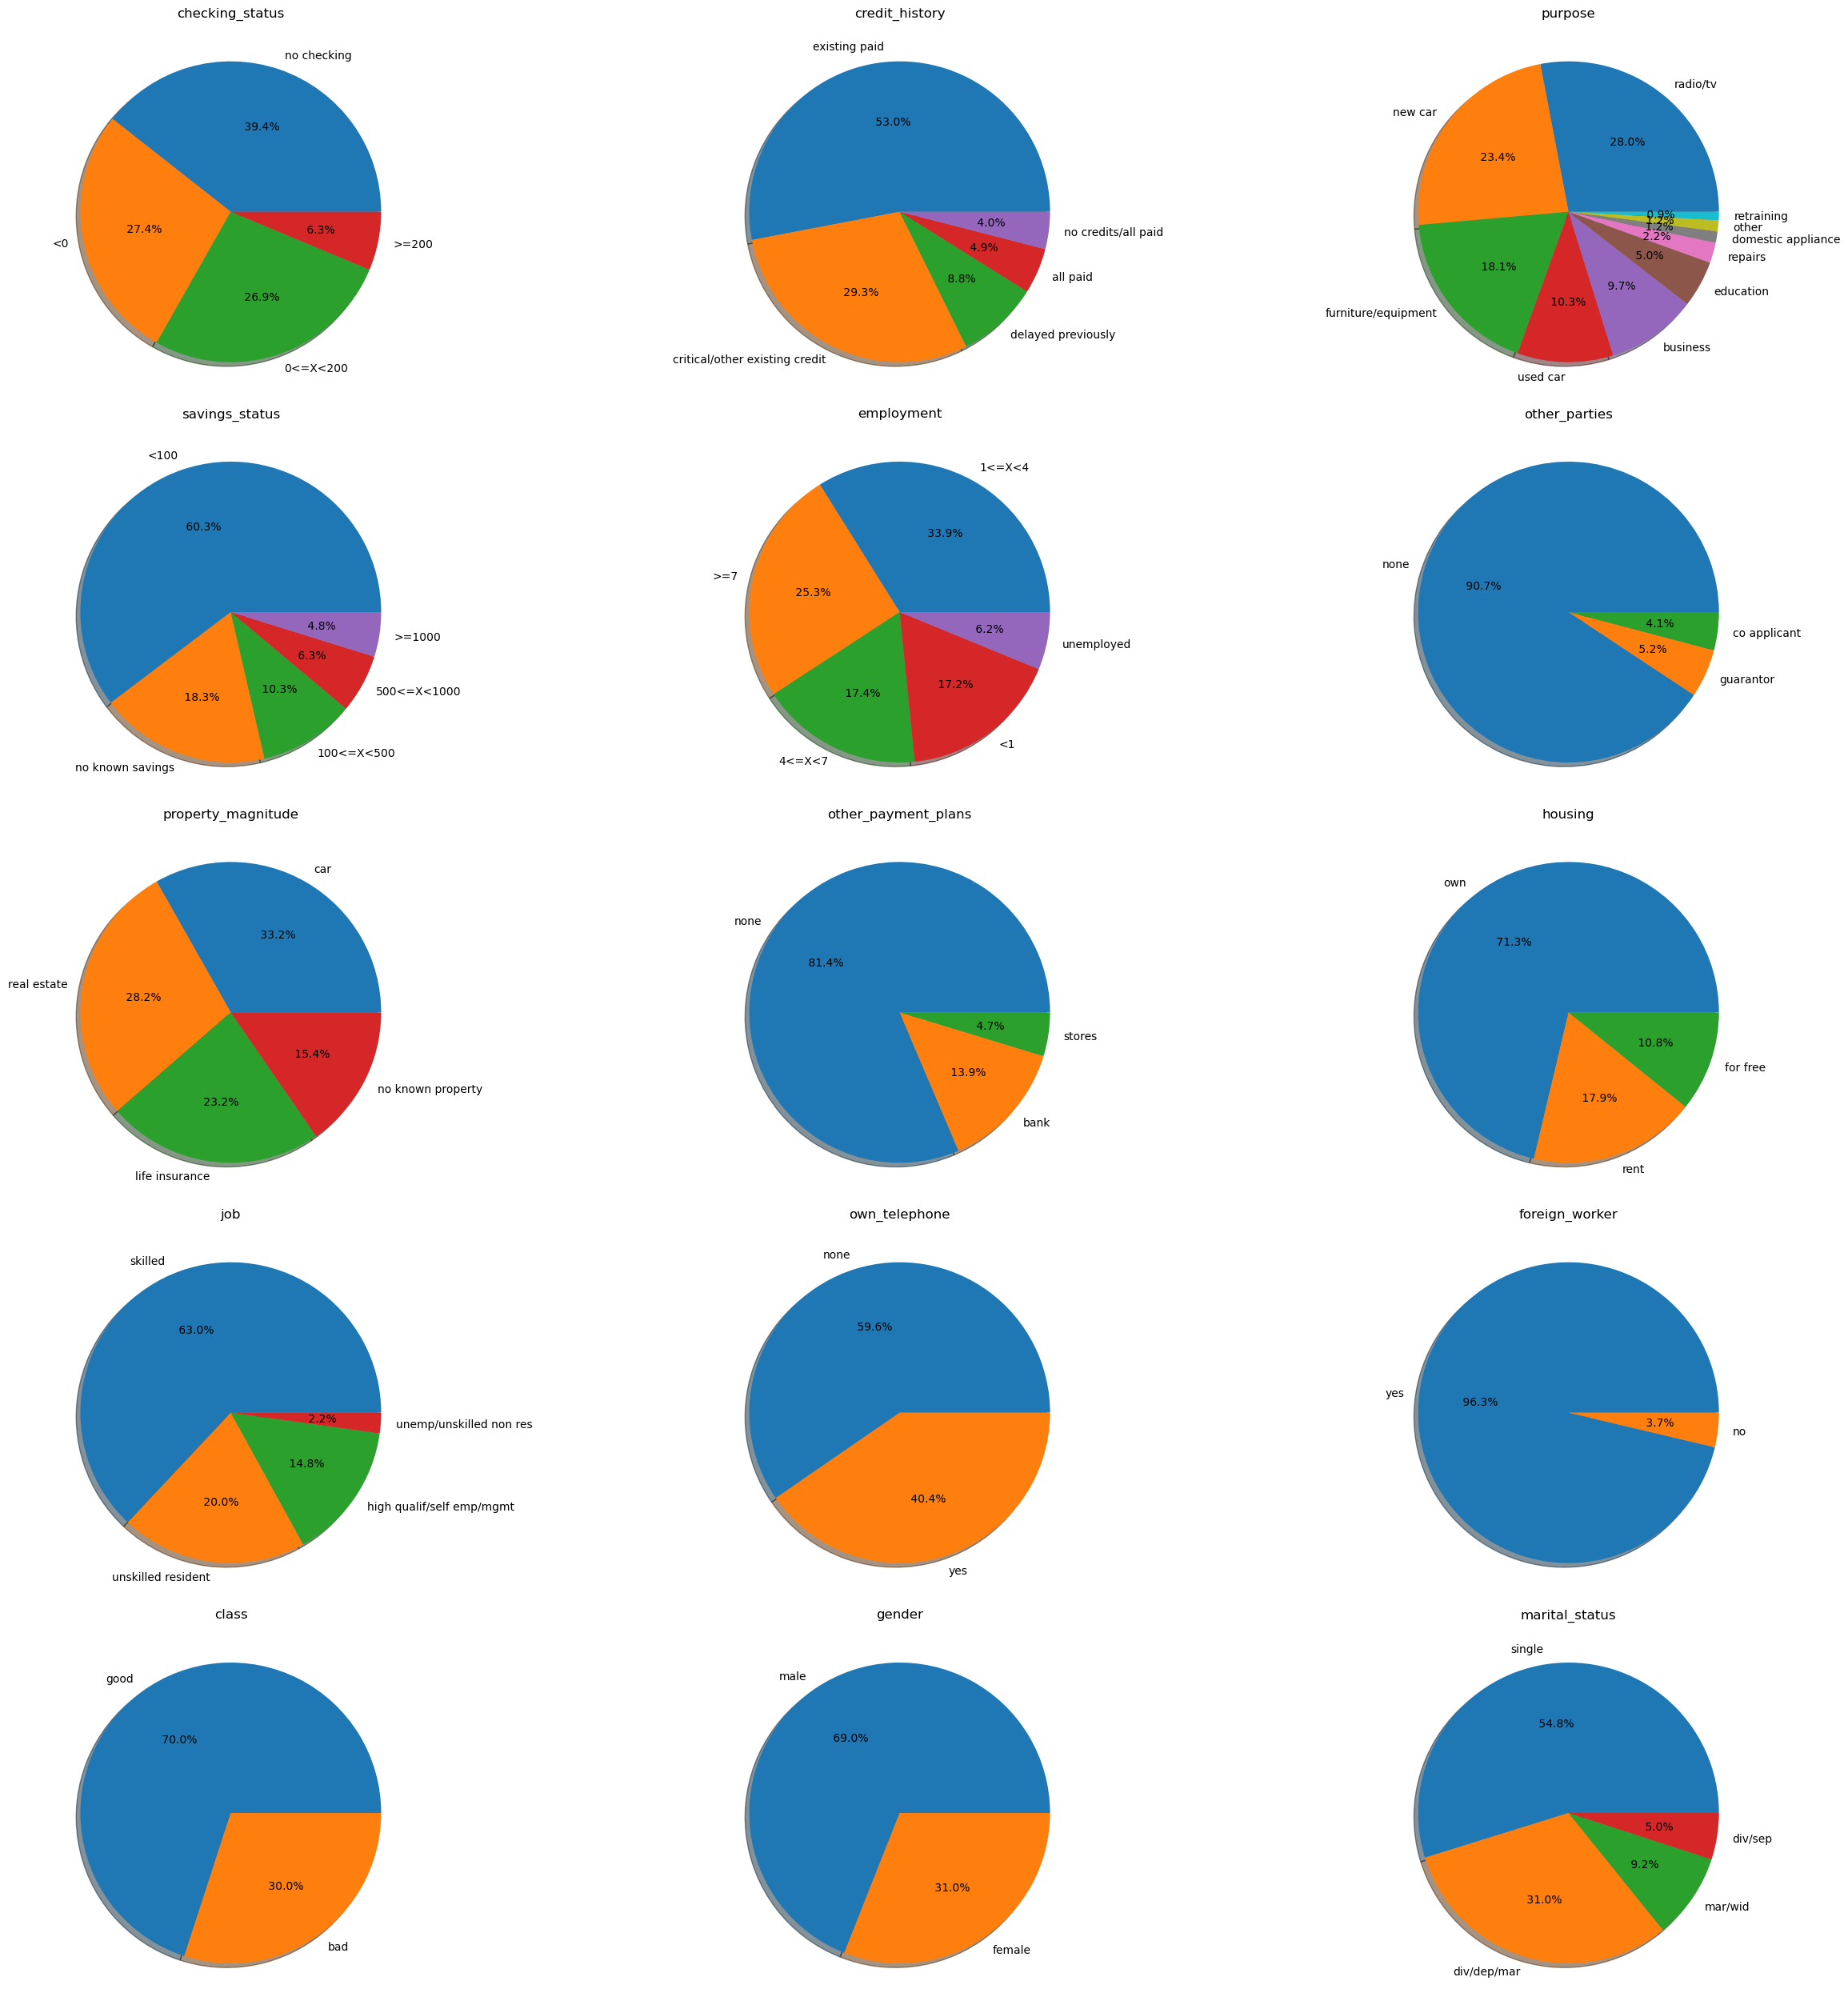

In [7]:
lst=['checking_status', 'credit_history', 'purpose', 'savings_status',
     'employment', 'other_parties', 'property_magnitude',
     'other_payment_plans', 'housing', 'job', 'own_telephone',
     'foreign_worker', 'class', 'gender', 'marital_status']
plt.figure(figsize=(25,25),layout='constrained')
for i in range(len(lst)):
    plt.subplot(5,3,i+1)
    a=credit[lst[i]].value_counts()
    lbl=a.index
    plt.pie(x=a,labels=lbl,autopct="% .1f%%",shadow=True)
    plt.title(lst[i])
plt.show()

Visualizing Numerical Features

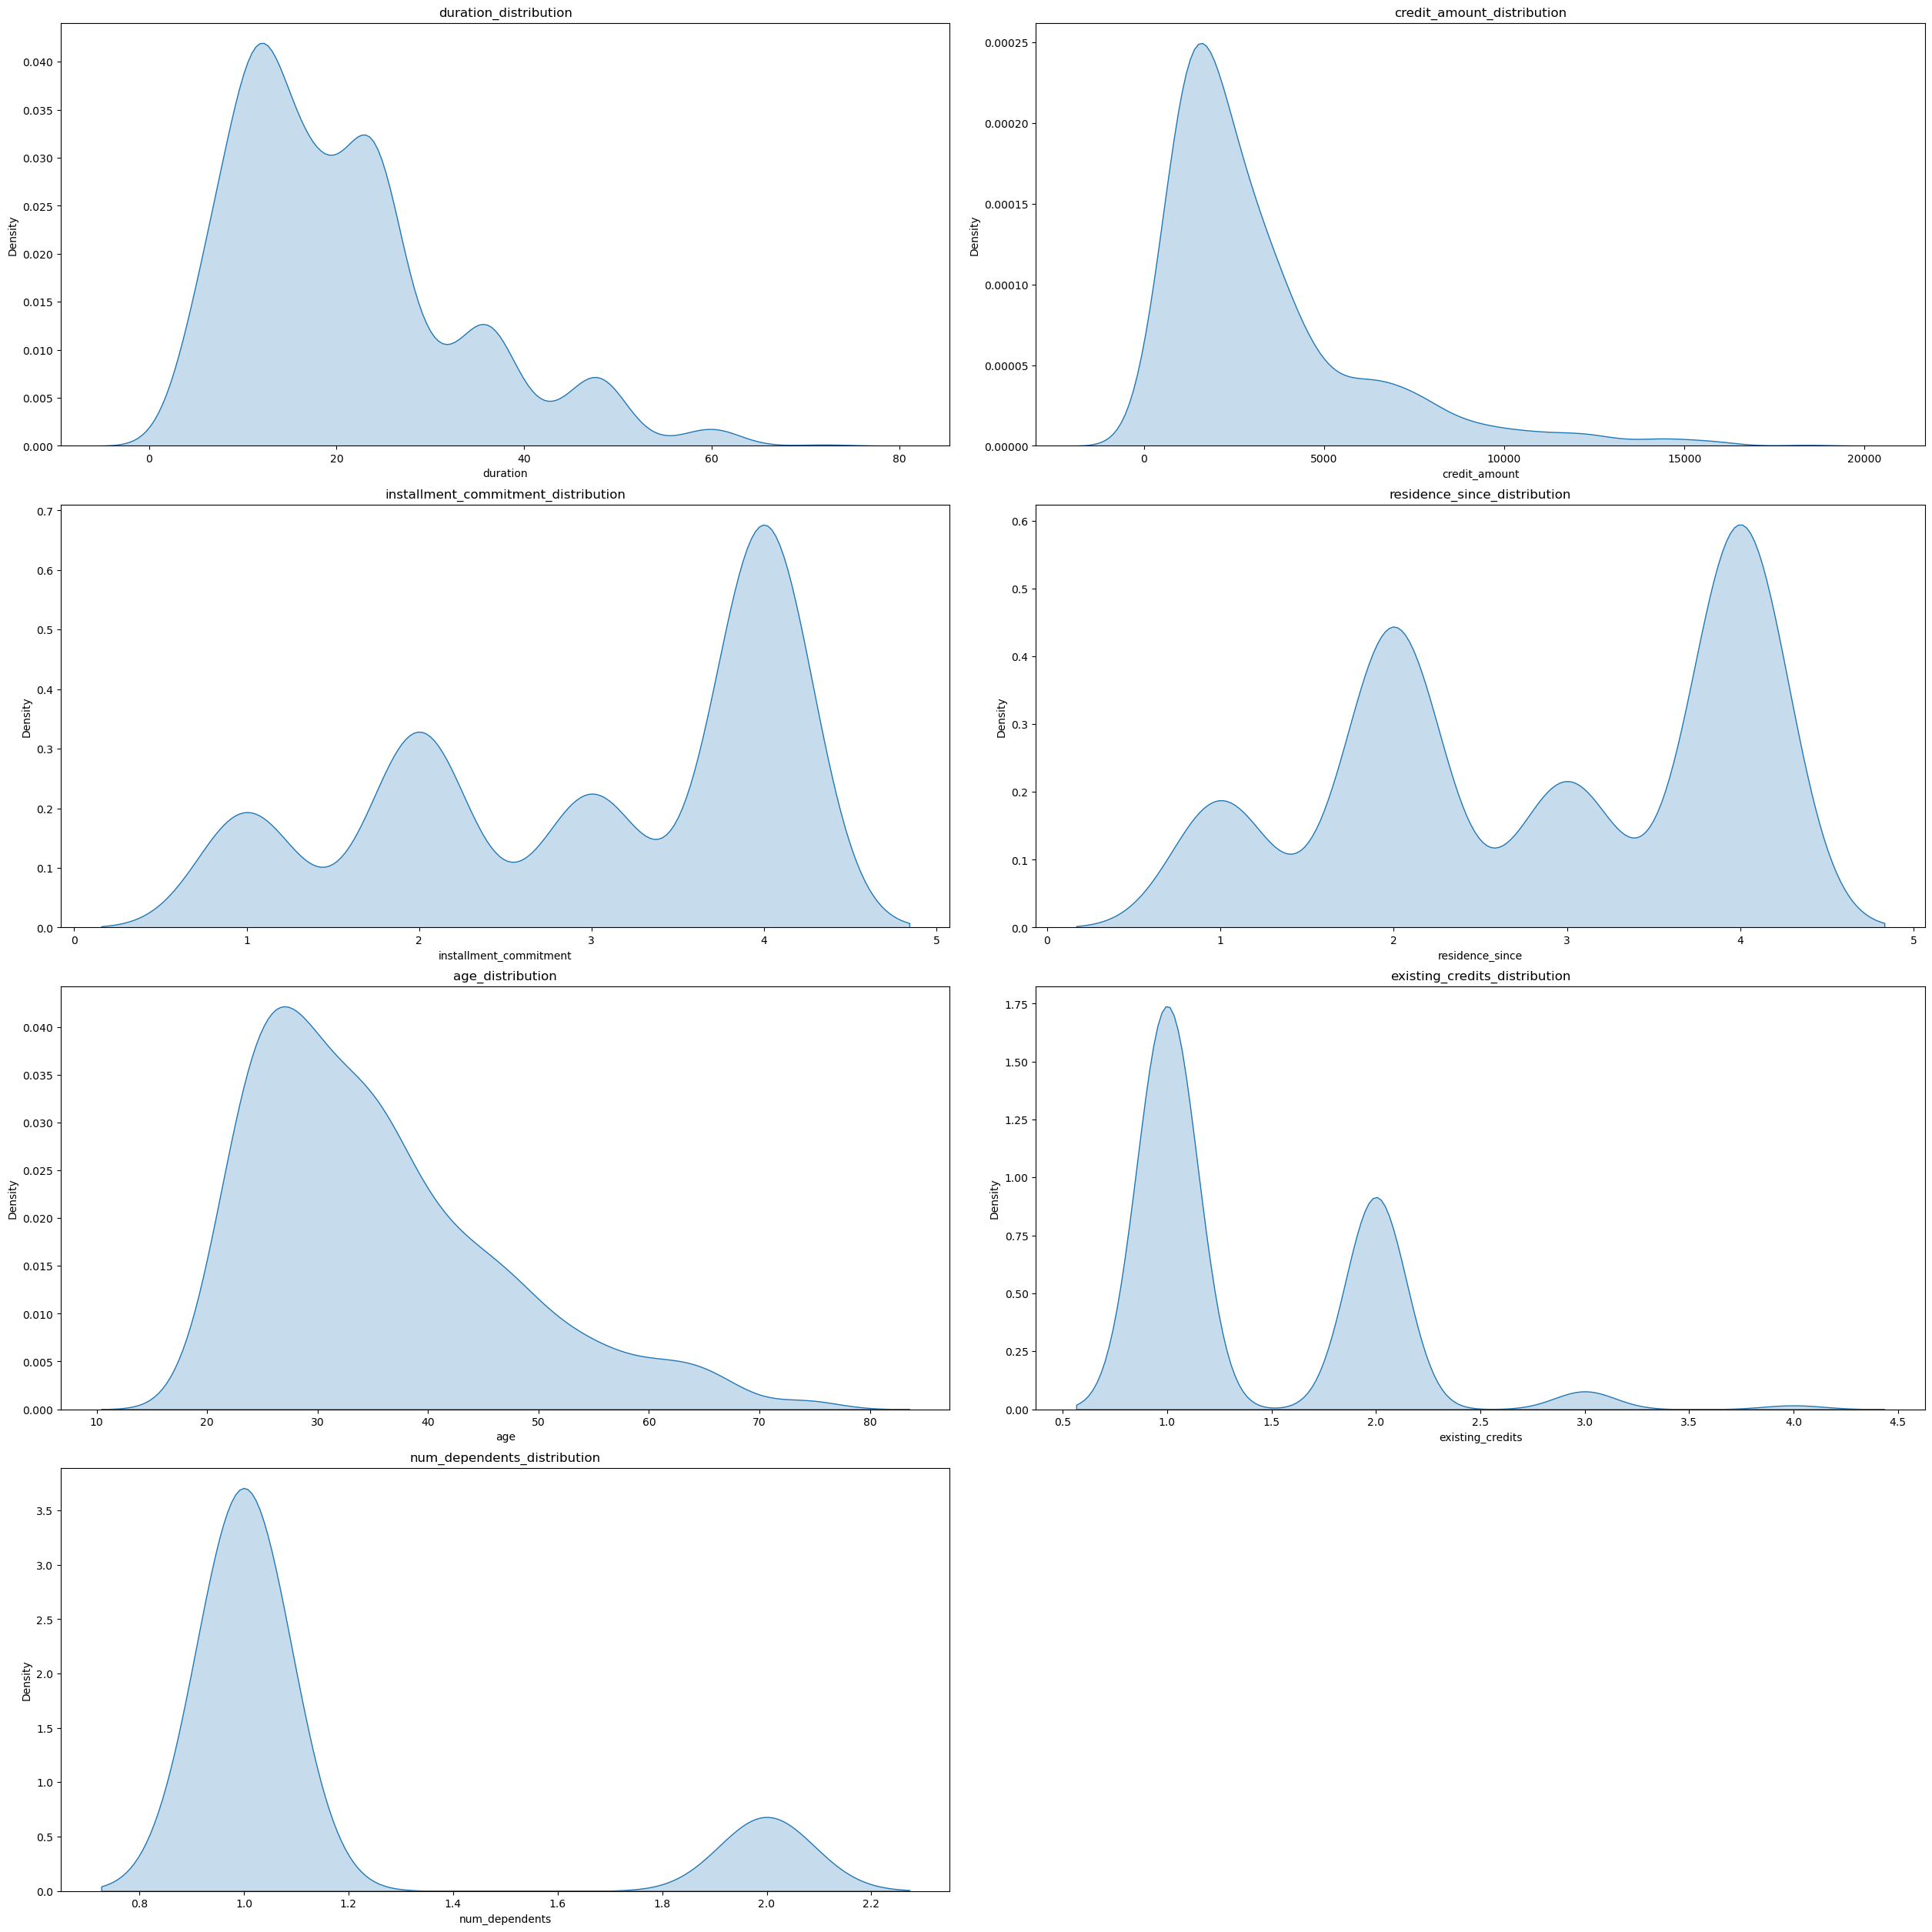

In [8]:
lst=['duration', 'credit_amount', 'installment_commitment',
     'residence_since', 'age', 'existing_credits', 'num_dependents']
plt.figure(figsize=(25,25),layout='constrained')
for i in range(len(lst)):
    plt.subplot(4,2,i+1)
    sns.kdeplot(data=credit,x=lst[i],shade=True)
    plt.title(lst[i]+'_distribution')
plt.show()


Visualizing Categorical Features against the target feature

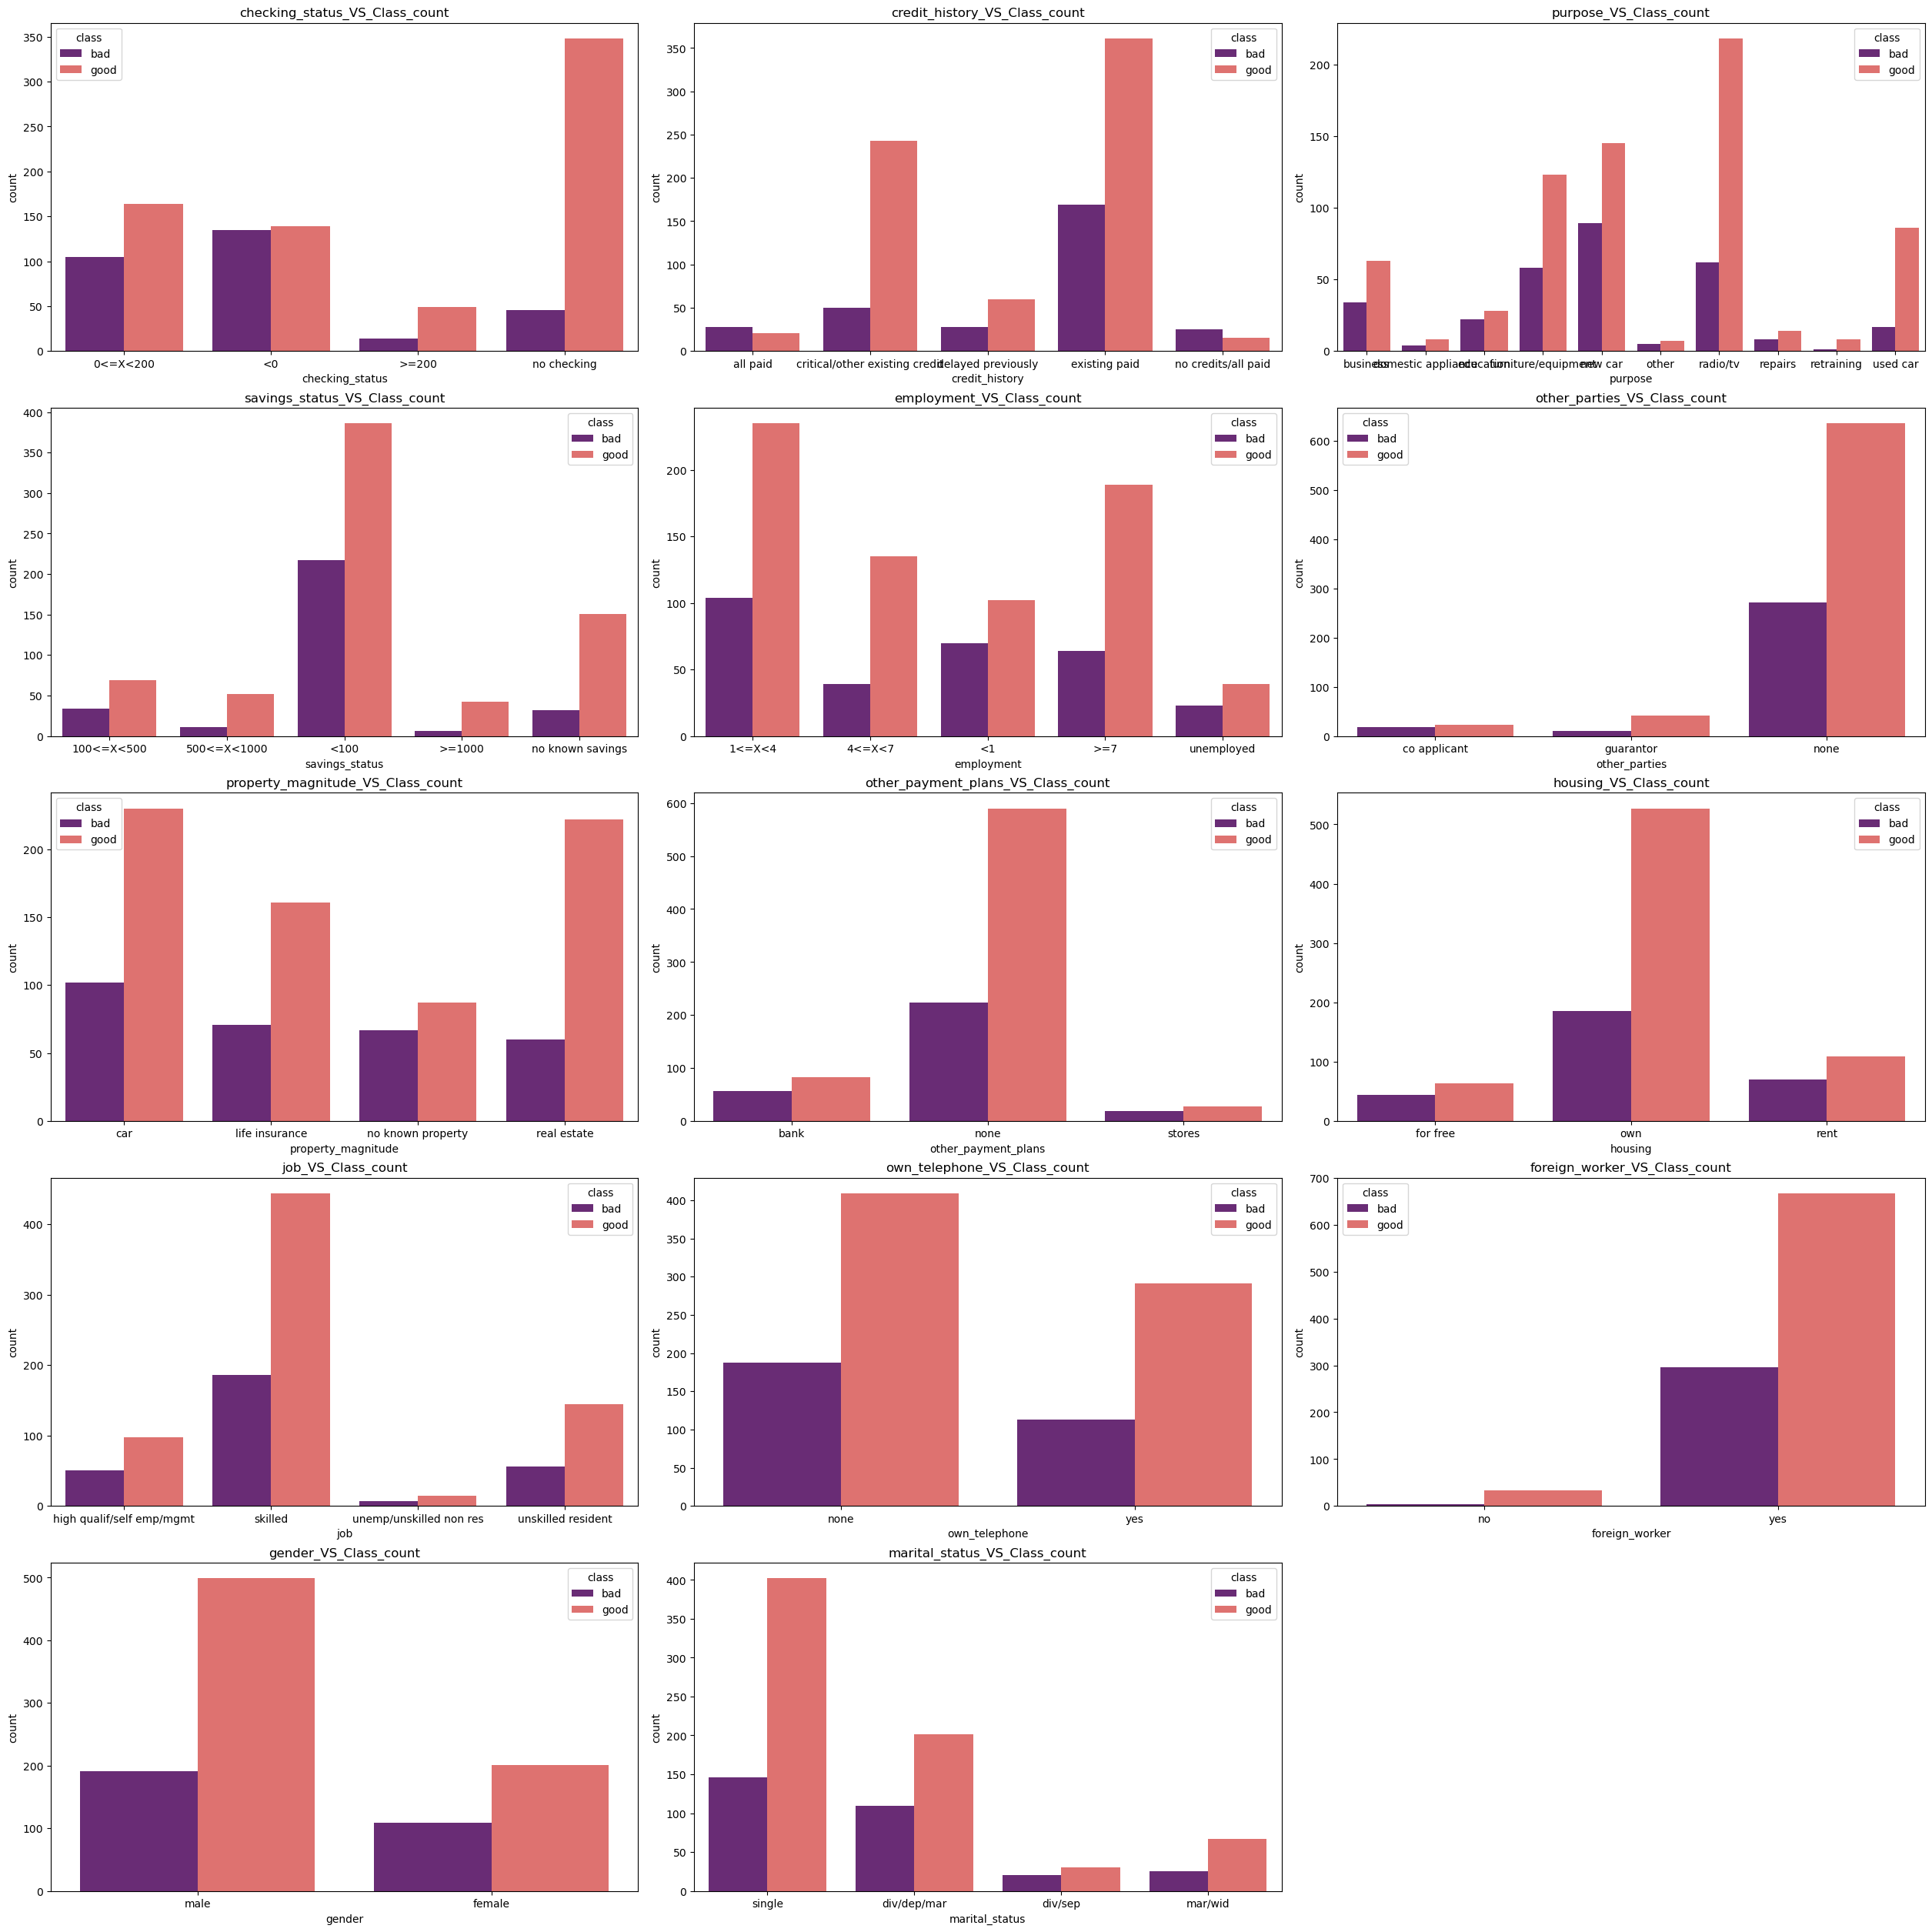

In [9]:
lst=['checking_status', 'credit_history', 'purpose', 'savings_status','employment', 'other_parties', 'property_magnitude','other_payment_plans', 'housing', 'job', 'own_telephone',
     'foreign_worker', 'gender', 'marital_status']
plt.figure(figsize=(25,25),layout='constrained')
for i in range(len(lst)):
    plt.subplot(5,3,i+1)
    sns.countplot(data=credit,x=lst[i],palette='magma',hue='class')
    plt.title(lst[i]+'_VS_Class_count')
plt.show()

# Data Scaling

In [10]:
# Label Encoding & Scaling
from sklearn.preprocessing import LabelEncoder,MinMaxScaler
# Model Building
from sklearn.model_selection import GridSearchCV,StratifiedKFold,KFold,train_test_split,cross_val_score,cross_val_predict
# Time
from time import time

In [11]:
# Label Encoding
for i in list(cat.columns):
    credit[i+'_encoder']=LabelEncoder().fit_transform(credit[i])

# Taking only numerical features
num=credit.select_dtypes(include=[np.number])

# Data Scaling
scl=pd.DataFrame(MinMaxScaler().fit_transform(num.to_numpy()),columns=num.columns)

# Scaled Data
scl.head()

,duration,credit_amount,installment_commitment,residence_since,age,existing_credits,num_dependents,checking_status_encoder,credit_history_encoder,purpose_encoder,...,other_parties_encoder,property_magnitude_encoder,other_payment_plans_encoder,housing_encoder,job_encoder,own_telephone_encoder,foreign_worker_encoder,class_encoder,gender_encoder,marital_status_encoder
0,0.029412,0.050567,1.000000,1.000000,0.857143,0.333333,0.0,0.333333,0.25,0.666667,...,1.0,1.000000,0.5,0.5,0.333333,1.0,1.0,1.0,1.0,1.0
1,0.647059,0.313690,0.333333,0.333333,0.053571,0.000000,0.0,0.000000,0.75,0.666667,...,1.0,1.000000,0.5,0.5,0.333333,0.0,1.0,0.0,0.0,0.0
2,0.117647,0.101574,0.333333,0.666667,0.535714,0.000000,1.0,1.000000,0.25,0.222222,...,1.0,1.000000,0.5,0.5,1.000000,0.0,1.0,1.0,1.0,1.0
3,0.558824,0.419941,0.333333,1.000000,0.464286,0.000000,1.0,0.333333,0.75,0.333333,...,0.5,0.333333,0.5,0.0,0.333333,0.0,1.0,1.0,1.0,1.0
4,0.294118,0.254209,0.666667,1.000000,0.607143,0.333333,1.0,0.333333,0.50,0.444444,...,1.0,0.666667,0.5,0.0,0.333333,0.0,1.0,0.0,1.0,1.0


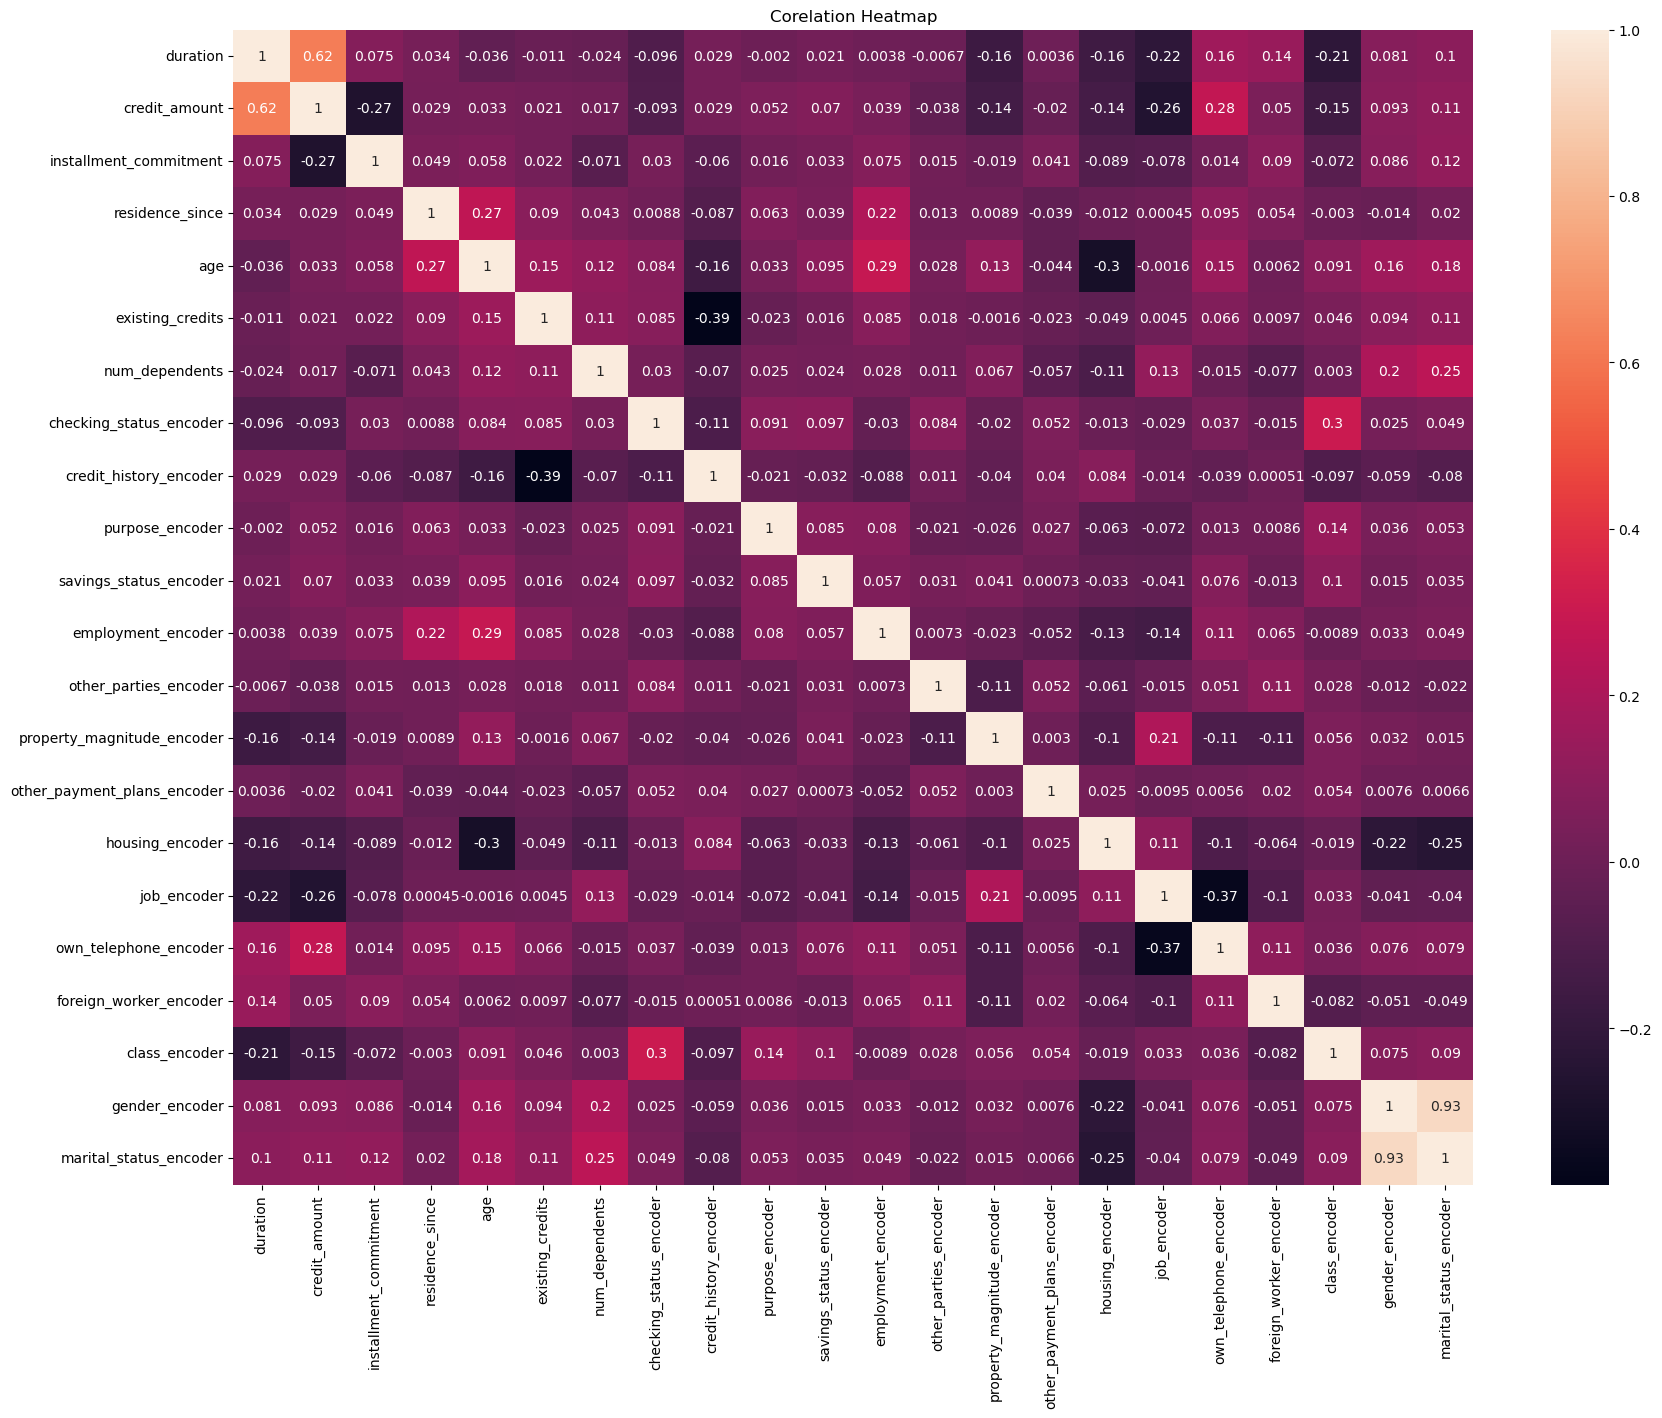

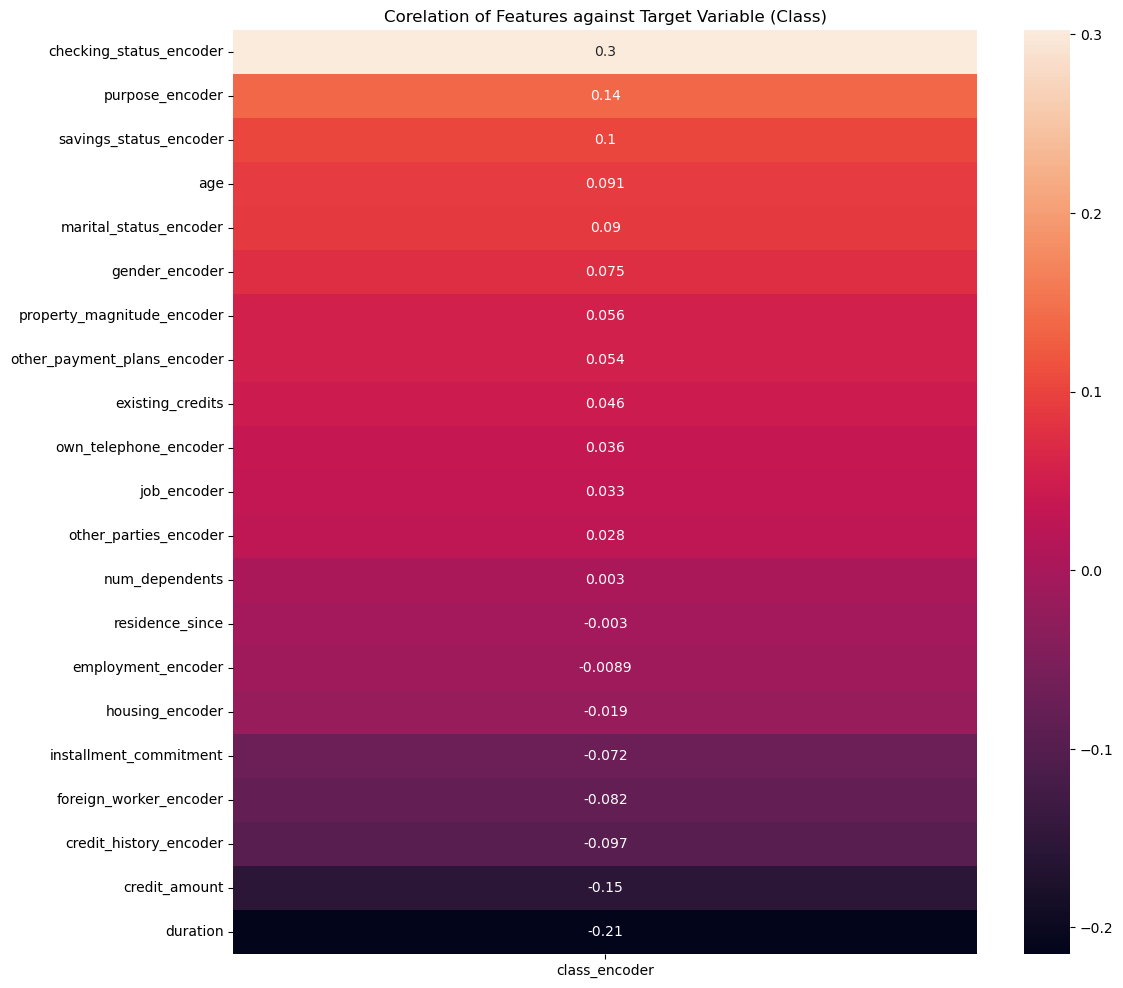

In [12]:
# Feature Selection for model Building
cor=scl.corr()
plt.figure(figsize=(20,15))
plt.title("Corelation Heatmap")
sns.heatmap(cor,annot=True)
plt.show()

# Features that decides class of a customer
cor=scl.corr()
cor_t=cor['class_encoder'].drop('class_encoder')
cor_s=cor_t.sort_values(ascending=False)
plt.figure(figsize=(12,12))
plt.title("Corelation of Features against Target Variable (Class)")
sns.heatmap(cor_s.to_frame(),annot=True)
plt.show()

# Model Evaluation

Featutes & target for model building

In [13]:
x=scl.drop('class_encoder',axis=1)
y=scl['class_encoder']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=1)

Model Evaluation

In [14]:
from models import model_lr
from models import model_dt
from models import model_knn
from models import model_rf

In [15]:
# Model Evaluation
acc_lr, f1_lr = model_lr(x_train,x_test,y_train,y_test)
acc_dt, f1_dt = model_dt(x_train,x_test,y_train,y_test)
acc_knn, f1_knn = model_knn(x_train,x_test,y_train,y_test)
acc_rf, f1_rf = model_rf(x_train,x_test,y_train,y_test)

*********** Logistic Regression***********


Accuracy :  0.7266666666666667
F1 Score :  0.8247863247863247
Confusion Matrix :
 [[ 25  61]
 [ 21 193]]
Classification Report :
               precision    recall  f1-score   support

         0.0       0.54      0.29      0.38        86
         1.0       0.76      0.90      0.82       214

    accuracy                           0.73       300
   macro avg       0.65      0.60      0.60       300
weighted avg       0.70      0.73      0.70       300

***********Decision Tree***********


Accuracy :  0.69
F1 Score :  0.7790973871733966
Confusion Matrix :
 [[ 43  43]
 [ 50 164]]
Classification Report :
               precision    recall  f1-score   support

         0.0       0.46      0.50      0.48        86
         1.0       0.79      0.77      0.78       214

    accuracy                           0.69       300
   macro avg       0.63      0.63      0.63       300
weighted avg       0.70      0.69      0.69       300

***********K Near

# Model Performance Comparison

In [16]:
# Creating tabular format for better comparison
tbl=pd.DataFrame()
tbl['Model']=pd.Series(['Logistic Regreesion','Decision Tree','KNN','Random Forest'])
tbl['Accuracy']=pd.Series([acc_lr,acc_dt,acc_knn,acc_rf])
tbl['F1_Score']=pd.Series([f1_lr,f1_dt,f1_knn,f1_rf])
tbl.set_index('Model')

,Accuracy,F1_Score
Model,,
Logistic Regreesion,0.726667,0.824786
Decision Tree,0.690000,0.779097
KNN,0.686667,0.788288
Random Forest,0.760000,0.844156


In [17]:
# Best model on the basis of F1 Score
tbl.sort_values('F1_Score',ascending=False)

,Model,Accuracy,F1_Score
3,Random Forest,0.760000,0.844156
0,Logistic Regreesion,0.726667,0.824786
2,KNN,0.686667,0.788288
1,Decision Tree,0.690000,0.779097
